In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def split_X_y(dataframe, target='y'):
    # Creates X matrix od independent variables and the dependent y vector from dataframe; return X, y
    y = dataframe[target]
    X = dataframe.drop([target], axis=1)
    return X, y

def split_train_test(X, y, test_size=0.3, random_state=9):
    # Performs train test split  and returns X_train, X_test, y_train, y_test
    from sklearn.model_selection import  train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def label_encoding_(cat_col):
    label=preprocessing.LabelEncoder()
    label.fit(cat_col)
    return pd.DataFrame(label.transform(cat_col))


def metrics_info(y_test,y_pred):
    confusion_matrix_metrics(y_test,y_pred)
    roc_auc_metrics(y_test,y_pred)
    
    print('F1 score: ', f1_score(y_test,y_pred))
    print('*'*100)

def log_metrics_info(y_test,y_pred,y_pred_prob):
    confusion_matrix_metrics(y_test,y_pred)
    roc_auc_log_metrics(y_test,y_pred,y_pred_prob)
    
    print('F1 score: ', f1_score(y_test,y_pred))
    print('*'*100)

def confusion_matrix_metrics(y_test,y_pred):
    # Printing values of different performance metrics
    conf_matrix = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix: ', conf_matrix)
    TP = conf_matrix[1,1]
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    
    print("TP:",TP)
    print("TN:",TN)
    print("FP:",FP)
    print("FN:",FN)
    print('*'*75)
    
    print("Classification Report : \n",classification_report(y_test,y_pred))
    print('*'*75)
    
    print("Classification Accuracy: %.2f%% " % (accuracy_score(y_test, y_pred) * 100.0))
    print("Classification Error:",(FP+FN)/(TP+TN+FP+FN))
    print('*'*75)
    
    print('Specificity or TNR: ', TN/(TN + FP))
    print('False negative rate or FNR: ', FN/(TP + FN))
    print('*'*75)
    
    print('ROC Curve (TPR vs FPR)')
    print('False positive rate or FPR: ', FP/(TN + FP))
    print('Recall (recall_score) or sensitivity or TPR: ', recall_score(y_test,y_pred))
    
    print('*'*75)
    print('PRECISION and RECALL')
    print('Precision (precision_score): ', precision_score(y_test,y_pred))
    print('Recall (recall_score) or sensitivity or TPR: ', recall_score(y_test,y_pred))
    print('TN/(TN +FN): ', TN/(TN +FN))

def roc_auc_metrics(y_test,y_pred):
    print('*'*75)
    print('Roc Auc (roc_auc_score):', roc_auc_score(y_test,y_pred))
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    print('Auc: ',auc(fpr,tpr))
    
    plot_roc_curve(fpr,tpr)
    print('*'*75)

def roc_auc_log_metrics(y_test,y_pred,y_pred_prob):
    print('*'*75)
    print('Roc Auc (roc_auc_score):', roc_auc_score(y_test,y_pred))
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    print('Auc: ',auc(fpr,tpr))
    
    print('Roc Auc (roc_auc_score) Prob:', roc_auc_score(y_test,y_pred_prob[:,1]))
    fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob[:,1])
    print('Auc Pred Prob: ',auc(fpr1,tpr1))
    
    plot_lr_roc_curve(fpr,tpr,fpr1,tpr1)
    print('*'*75)

def plot_roc_curve(fpr,tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    
def plot_lr_roc_curve(fpr,tpr,fpr1,tpr1):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(fpr1, tpr1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve classifier Pred Prob')
    plt.xlabel('False Positive Rate (1 - Specificity) ')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    

# Phase 2

In [6]:
bank_df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv',delimiter=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_df.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
bank_df[bank_df.marital =='married'].age.describe()

count    24928.000000
mean        42.307165
std         10.018179
min         20.000000
25%         34.000000
50%         41.000000
75%         49.000000
max         98.000000
Name: age, dtype: float64

(array([ 731., 6686., 7122., 5519., 3587.,  894.,  224.,  125.,   32.,
           8.]),
 array([20. , 27.8, 35.6, 43.4, 51.2, 59. , 66.8, 74.6, 82.4, 90.2, 98. ]),
 <a list of 10 Patch objects>)

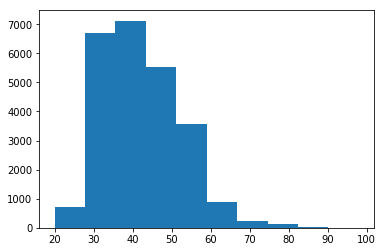

In [9]:
plt.hist(bank_df[bank_df.marital =='married'].age)

In [10]:
bank_df[bank_df.marital =='single'].age.describe()

count    11568.000000
mean        33.158714
std          7.534553
min         17.000000
25%         28.000000
50%         32.000000
75%         37.000000
max         86.000000
Name: age, dtype: float64

(array([5.500e+02, 4.201e+03, 4.247e+03, 1.612e+03, 6.170e+02, 2.820e+02,
        3.400e+01, 1.800e+01, 3.000e+00, 4.000e+00]),
 array([17. , 23.9, 30.8, 37.7, 44.6, 51.5, 58.4, 65.3, 72.2, 79.1, 86. ]),
 <a list of 10 Patch objects>)

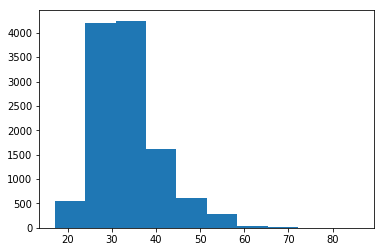

In [11]:
plt.hist(bank_df[bank_df.marital =='single'].age)

In [12]:
bank_df[bank_df.marital =='married'].age.median()


41.0

In [13]:
bank_df[bank_df.marital =='married'].age.mean()

42.30716463414634

In [14]:
bank_df[bank_df.marital =='divorced'].age.describe()


count    4612.000000
mean       44.899393
std        10.625599
min        24.000000
25%        37.000000
50%        44.000000
75%        52.000000
max        95.000000
Name: age, dtype: float64

(array([ 370., 1058., 1125., 1001.,  834.,   71.,   46.,   52.,   33.,
          22.]),
 array([24. , 31.1, 38.2, 45.3, 52.4, 59.5, 66.6, 73.7, 80.8, 87.9, 95. ]),
 <a list of 10 Patch objects>)

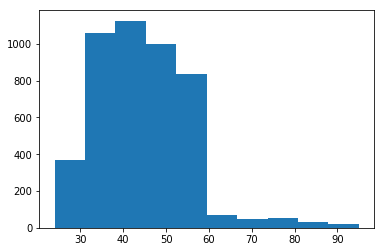

In [15]:
plt.hist(bank_df[bank_df.marital =='divorced'].age)

In [16]:
bank_df.loc[(bank_df['marital']  == 'unknown') & (bank_df['age']  >= 42), 'marital'] = 'married'
bank_df.loc[(bank_df['marital']  == 'unknown') & (bank_df['age']  < 42), 'marital'] = 'single'

In [17]:
bank_df.isin(['unknown']).sum()

age                  0
job                330
marital              0
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# Job

In [18]:
bank_df.job.value_counts()


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
job_edu_crosstab = pd.crosstab(index=bank_df.job,columns=bank_df.education)

job_edu_crosstab
#bank_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [20]:
job_edu_crosstab.head()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123


In [21]:
man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'basic')]['y'].index
bank_df.loc[man_index, 'job'] = 'unskilled'

man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'professional.course')]['y'].index
bank_df.loc[man_index, 'job'] = 'services'

man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'university.degree')]['y'].index



bank_df.loc[man_index, 'job'] = 'management'

pd.crosstab(index=bank_df.job,columns=bank_df.education)


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2108,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,230,173,150
student,26,13,99,357,0,43,170,167


In [22]:
# Clubbing education into similar education
edu_Job_df = pd.crosstab(index=bank_df.job,columns=bank_df.education);

bank_df_df =  edu_Job_df["basic.4y"] + edu_Job_df["basic.6y"] +edu_Job_df["basic.9y"] +edu_Job_df["high.school"] 



bank_df['education'] = bank_df['education'].map({'basic.4y': 'basic', 'basic.6y': 'basic' , 'basic.9y': 'basic', 

                                           'high.school': 'basic' ,'illiterate':'illiterate',

                                          'professional.course' : 'professional.course',

                                           'university.degree':'university.degree',

                                            'unknown':'unknown'})

print(bank_df['education'])


0                      basic
1                      basic
2                      basic
3                      basic
4                      basic
5                      basic
6        professional.course
7                    unknown
8        professional.course
9                      basic
10                   unknown
11                     basic
12                     basic
13                     basic
14                     basic
15                     basic
16                     basic
17                     basic
18                     basic
19                     basic
20                     basic
21                     basic
22                     basic
23                     basic
24                     basic
25         university.degree
26                   unknown
27                     basic
28         university.degree
29         university.degree
                ...         
41158                  basic
41159                  basic
41160      university.degree
41161      uni

In [23]:
# Clubbing jobs into similar jobs
bank_df['job'] = bank_df['job'].map({'admin': 'services', 'blue-collar': 'unskilled' , 'entrepreneur': 'entrepreneur', 

                                           'housemaid': 'unskilled' ,

                                            'management':'management',

                                          'retired' : 'retired',

                                           'self-employed':'self-employed',

                                            'services':'services',

                                            'student': 'student' ,

                                            'management':'management',

                                          'technician' : 'services',

                                           'unemployed':'unemployed',

                                   'unknown':'unknown' })

pd.crosstab(index=bank_df.job,columns=bank_df.education)


education,basic,illiterate,professional.course,university.degree,unknown
job,,,,,
entrepreneur,652,2,135,610,57
management,649,0,89,2108,123
retired,1093,3,241,285,98
self-employed,456,3,168,765,29
services,4830,0,3550,1982,362
student,495,0,43,170,167
unemployed,591,0,142,262,19
unknown,142,0,0,0,131
unskilled,9064,9,512,233,496


In [24]:
drop_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'unknown')]['y'].index

bank_df.drop(drop_index,axis=0,inplace=True)

#bank_df.drop(bank_df[bank_df["job"] =="unknow" & bank_df["job"] =="unknow"], inplace = True)

#print(bank_df)

pd.crosstab(index=bank_df.job,columns=bank_df.education)


bank_df.loc[man_index, 'education'] = 'university.degree'

pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'entrepreneur') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'retired') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'self-employed') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'university.degree'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'services') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'professional.course'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'student') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'unemployed') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

#pd.crosstab(index=bank_df.job,columns=bank_df.education)

man_index = bank_df[(bank_df.job == 'unskilled') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

man_index = bank_df[(bank_df.job == 'management') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'university.degree'

man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'basic')]['y'].index

bank_df.loc[man_index, 'job'] = 'unskilled'

pd.crosstab(index=bank_df.job,columns=bank_df.education)


education,basic,illiterate,professional.course,university.degree
job,,,,
entrepreneur,709,2,135,610
management,649,0,89,2231
retired,1191,3,241,285
self-employed,456,3,168,794
services,4830,0,3912,1982
student,662,0,43,170
unemployed,610,0,142,262
unskilled,9702,9,512,233


In [25]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               30635 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [26]:
bank_df['default'].unique()


array(['no', 'unknown', 'yes'], dtype=object)

# Label Encoding

In [27]:
#from sklearn import preprocessing
#selected_cat_col = ['default','housing','loan','y']

#for cat_col in selected_cat_col:
#    bank_df[cat_col]=label_encoding_(bank_df[cat_col])

In [28]:
bank_df['default'].unique()
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [29]:
job_edu_crosstab['basic']=job_edu_crosstab['basic.4y']+job_edu_crosstab['basic.6y']+job_edu_crosstab['basic.9y']
job_edu_crosstab.drop(['basic.4y','basic.6y','basic.9y'],axis=1,inplace=True)

In [30]:
drop_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'unknown')]['y'].index

bank_df.drop(drop_index,axis=0,inplace=True)

bank_df.isin(['unknown']).sum()


age                  0
job                  0
marital              0
education          249
default           8523
housing            988
loan               988
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [31]:
job_edu_crosstab


education,high.school,illiterate,professional.course,university.degree,unknown,basic
job,,,,,,
admin.,3329,1,363,5753,249,727
blue-collar,878,8,453,94,454,7367
entrepreneur,234,2,135,610,57,418
housemaid,174,1,59,139,42,645
management,298,0,89,2063,123,351
retired,276,3,241,285,98,817
self-employed,118,3,168,765,29,338
services,2682,0,218,173,150,746
student,357,0,43,170,167,138


In [32]:
df_unskilled = bank_df[(bank_df.job == 'blue-collar') | (bank_df.job == 'housemaid')]
df_service = bank_df[(bank_df.job == 'admin.') | (bank_df.job == 'services') | (bank_df.job == 'technician')]
df_entrepreneural = bank_df[(bank_df.job == 'entrepreneur') | (bank_df.job == 'self-employed')]
df_professional = bank_df[(bank_df.job == 'management')]
df_student = bank_df[(bank_df.job == 'student')]
df_retired = bank_df[(bank_df.job == 'retired')]
df_unemployed = bank_df[(bank_df.job == 'unemployed')]

In [33]:
bank_df.loc[df_unskilled.index, 'job'] = 'Unskilled'
bank_df.loc[df_service.index, 'job'] = 'Service'
bank_df.loc[df_entrepreneural.index, 'job'] = 'Entrepreneural'
bank_df.loc[df_professional.index, 'job'] = 'Professional'
bank_df.loc[df_student.index, 'job'] = 'Student'
bank_df.loc[df_retired.index, 'job'] = 'Retired'
bank_df.loc[df_unemployed.index, 'job'] = 'Unemployed'

In [50]:
df_new=pd.DataFrame(bank_df.copy())
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,unskilled,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,Service,married,basic,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,Service,married,basic,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,NaN,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,Service,married,basic,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
df = df_new[(df_new.education == 'unknown') & (df_new.job == 'management')].index.values
df_new.loc[df4, 'education'] = 'university.degree'

NameError: name 'df4' is not defined

In [49]:
df1 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Basic')].index.values
df2 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Degree')].index.values
df3 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Mid')].index.values

df_new.loc[df1, 'job'] = 'Unskilled'
df_new.loc[df2, 'job'] = 'Service'
df_new.loc[df3, 'job'] = 'Service'

df4 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Professional')].index.values
df5 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Retired')].index.values
df6 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Service')].index.values
df7 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Student')].index.values
df8 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Unemployed')].index.values
df9 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Unskilled')].index.values

df_new.loc[df4, 'education'] = 'Degree'
df_new.loc[df5, 'education'] = 'Basic'
df_new.loc[df6, 'education'] = 'Degree'
df_new.loc[df7, 'education'] = 'Mid'
df_new.loc[df8, 'education'] = 'Mid'
df_new.loc[df9, 'education'] = 'Mid'

In [51]:

bank_df.loc[df_unskilled.index, 'job'] = 'Unskilled'
bank_df.loc[df_basic_work.index, 'job'] = 'BasicWork'
bank_df.loc[df_services.index, 'job'] = 'Service'
bank_df.loc[df_professional_work.index, 'job'] = 'Professional'
bank_df.loc[df_student.index, 'job'] = 'Student'
bank_df.loc[df_retired.index, 'job'] = 'Retired'
bank_df.loc[df_unemployed.index, 'job'] = 'Unemployed'



NameError: name 'df_basic_work' is not defined

In [53]:
bank_df.head()
bank_df.to_csv('bank_df.csv')

In [ ]:
df.loc[df_unskilled.index, 'job'] = 'Unskilled'
df.loc[df_service.index, 'job'] = 'Service'
df.loc[df_professional.index, 'job'] = 'Professional'
df.loc[df_student.index, 'job'] = 'Student'
df.loc[df_retired.index, 'job'] = 'Retired'
df.loc[df_unemployed.index, 'job'] = 'Unemployed'

## Feature Importance

In [ ]:
def chi2_test(cat_df, X, y, k=10):
    '''
    Performs chi2 feature importance/significance test
    takes categorical variables as input 
    returns chi2_df
    '''
    Xd = pd.get_dummies(X)
    cat_df_oh = pd.get_dummies(cat_df)
    skb = SelectKBest(chi2,k=k)
    skb.fit(cat_df_oh, y)
    chi2_df = Xd[cat_df_oh.columns[skb.get_support()]]
    
    chi2_test_df = pd.DataFrame(skb.scores_,columns=['chi2 score'])
    chi2_test_df['pvals'] = skb.pvalues_
    chi2_test_df.sort_values(by='pvals',ascending=True)

    return chi2_df, chi2_test_df